In [1]:
# Importing Libraries

#To create dataframes
import pandas as pd

#To have math operations
import numpy as np


#Scikit-learn
#Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier



import string
from string import digits

#For Plotting
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import cufflinks as cf
import plotly
from plotly.offline import iplot
import chart_studio.plotly as py

#Extracting Years,Months and days
from datetime import datetime


In [2]:
#Importing the Dataset

dataset = pd.read_csv('SLIIT_CODEFEST_Datathon_Final_Round/SLIIT_Final_Round/Sample_Dataset/telecom_users.csv')


In [3]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:

#Size of the dataset
print(dataset.shape)

(7043, 21)


In [5]:
#Check the number of null values in the dataset
dataset.isnull().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#Taking the count of customers who Churn and Not
print(dataset['Churn'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


### Exploratory Analysis - PreModeling

In [ ]:
dfm = dataset.melt(id_vars='Churn', value_vars=dataset.columns[:-1], var_name='Feature')

p = sns.relplot(kind='scatter', data=dfm, x='value', y='price', height=3,
                col='Feature', col_wrap=4, facet_kws={'sharex': False})


In [7]:
#Comparing the Churn with PhoneService
cf.go_offline()
sns.set(style='whitegrid')

pd.crosstab(dataset['PhoneService'],dataset['Churn']).iplot(kind='bar' , title = 'Phone Service Vs Churn' ,xTitle = 'Phone Service',yTitle = 'Count' )

In [8]:
#Comparing the Churn with the Contract Type
cf.go_offline()
sns.set(style='whitegrid')

pd.crosstab(dataset['Contract'],dataset['Churn']).iplot(kind='bar' , title = 'Contract Vs Churn' ,xTitle = 'Contract',yTitle = 'Count' )

In [9]:
#Comparing the Churn with Internet Service
cf.go_offline()
sns.set(style='whitegrid')

pd.crosstab(dataset['InternetService'],dataset['Churn']).iplot(kind='bar' , title = 'Internet Service Type Vs Churn' ,xTitle = 'Internet Service Type',yTitle = 'Count' )

In [10]:
#According to the payment Method Churn distribution

cf.go_offline()
sns.set(style='whitegrid')

pd.crosstab(dataset['PaymentMethod'],dataset['Churn']).iplot(kind='bar' , title = 'Payment Method Vs Churn' ,xTitle = 'Payment Method',yTitle = 'Count' )

In [11]:
dataset['OnlineSecurity'].unique()
dataset['OnlineSecurity'].replace({'No internet service': 'No'}, inplace=True)



In [12]:
#According to the payment Method Churn distribution

cf.go_offline()
sns.set(style='whitegrid')

pd.crosstab(dataset['OnlineSecurity'],dataset['Churn']).iplot(kind='bar' , title = 'Online Security Vs Churn' ,xTitle = 'Online Security',yTitle = 'Count' )

In [13]:
#average customer lifetime
dataset['tenure'].mean()

32.37114865824223

### Pre Processing

In [14]:
#Dataframe
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
#remove columns with no prediction value
dataset = dataset.drop(['customerID'], axis = 1)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
#Converting Yes-1 and No-0
binary_columns = [ 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies', 'PaperlessBilling', 'Churn']


#Convert binary cols
#Replacing NULLs with 0
for col in dataset[binary_columns]:
    dataset.fillna(0, inplace=True)

#make yes = 1, else 0
dataset[binary_columns] = (dataset[binary_columns] == 'Yes').astype(int)

In [17]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [18]:
#Converting Gender
dataset['gender'] = dataset['gender'].map({'Female': 1, 'Male': 2})
# Converting Internet Service
dataset['InternetService'] = dataset['InternetService'].map({'DSL': 1, 'No': 0, 'Fiber optic' : 2})
#Converting Contract
dataset['Contract'] = dataset['Contract'].map({'Month-to-month': 1, 'One year': 2, 'Two year' : 3})
#Converting PaymentMethod
dataset['PaymentMethod'] = dataset['PaymentMethod'].map({'Electronic check': 1, 'Mailed check': 2, 'Bank transfer (automatic)' : 3 , 'Credit card (automatic)' : 4})

In [19]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,1,29.85,29.85,0
1,2,0,0,0,34,1,0,1,1,0,1,0,0,0,2,0,2,56.95,1889.5,0
2,2,0,0,0,2,1,0,1,1,1,0,0,0,0,1,1,2,53.85,108.15,1
3,2,0,0,0,45,0,0,1,1,0,1,1,0,0,2,0,3,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,1,1,1,70.70,151.65,1


In [20]:
#change total charges to float
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors='coerce')

dataset.dtypes

gender                int64
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int64
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int64
PaperlessBilling      int32
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

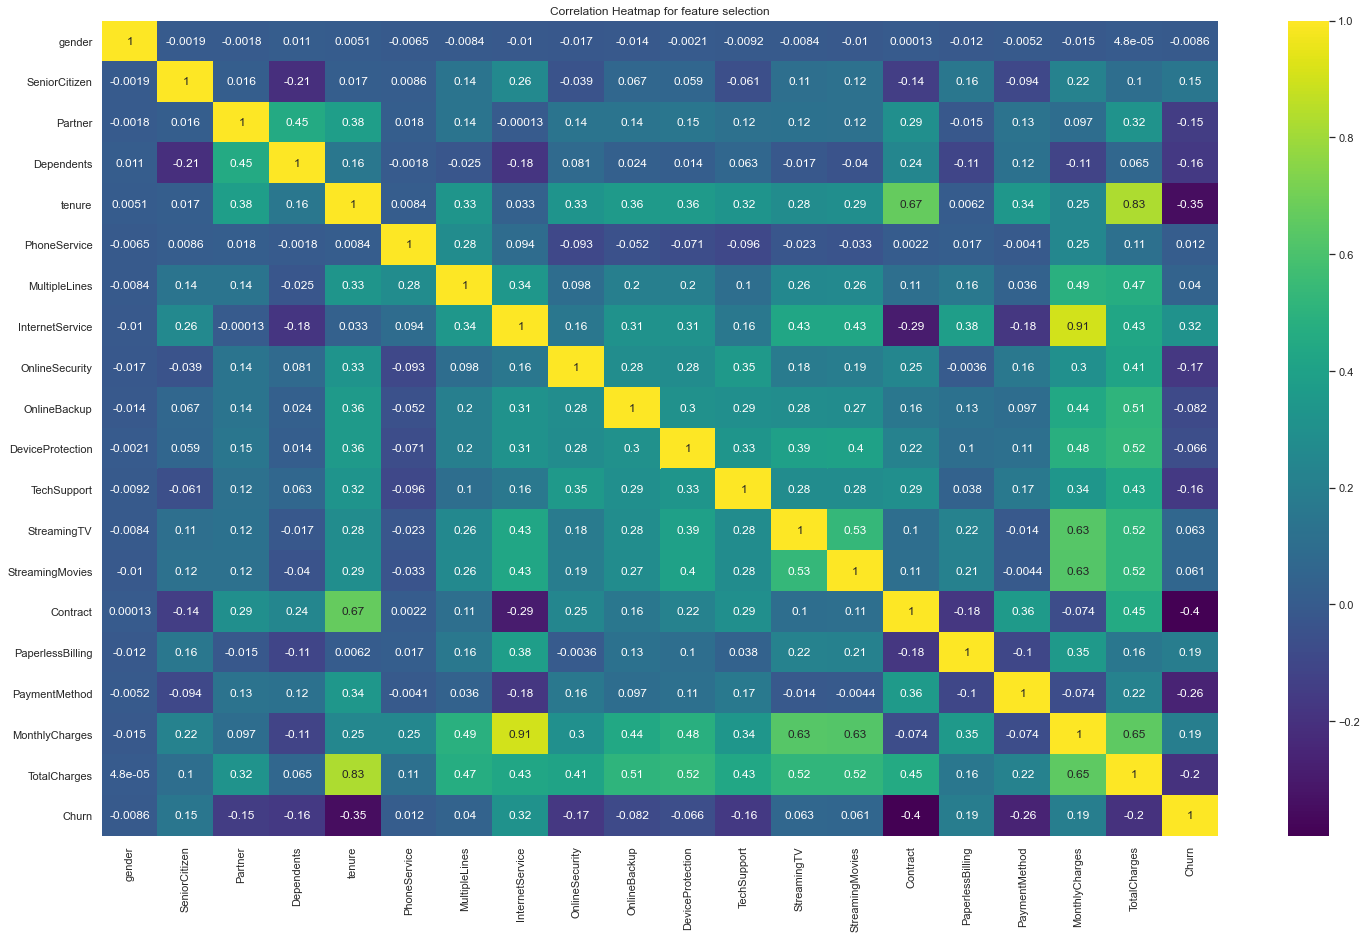

In [21]:
#plot the heatmap to identify corelation between the features

plt.figure(figsize=(25,15))
sns.heatmap(dataset.corr(),annot=True,cmap='viridis')
plt.title('Correlation Heatmap for feature selection');

### Selected  Features - Through Microsoft Machine Learning Studio
#### Using Pearson Correlation 

+ tenure
+ MonthlyCharges
+ SeniorCitizen
+ gender
+ Partner
+ Dependents
+ PhoneService
+ MultipleLines
+ InternetService
+ OnlineSecurity
+ OnlineBackup
+ DeviceProtection
+ TechSupport
+ StreamingTV
+ StreamingMovies

In [22]:
#remove columns which not selected
dataset_fs = dataset.drop(['TotalCharges','PaymentMethod','PaperlessBilling','Contract',], axis = 1)
dataset_fs.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,29.85,0
1,2,0,0,0,34,1,0,1,1,0,1,0,0,0,56.95,0
2,2,0,0,0,2,1,0,1,1,1,0,0,0,0,53.85,1
3,2,0,0,0,45,0,0,1,1,0,1,1,0,0,42.30,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,70.70,1


In [23]:
dataset_fs.shape

(7043, 16)

#### Splitting Dataset into Testing and Training sets

In [24]:
# Isolating the Prediction column

X = dataset_fs.drop('Churn',axis=1)
y = dataset_fs['Churn']


In [25]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,29.85
1,2,0,0,0,34,1,0,1,1,0,1,0,0,0,56.95
2,2,0,0,0,2,1,0,1,1,1,0,0,0,0,53.85
3,2,0,0,0,45,0,0,1,1,0,1,1,0,0,42.30
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,70.70


In [26]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [27]:
#Spliiting the dataset

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


#### Model Building


##### Random Forest

In [28]:

RFclassifier=RandomForestClassifier()
RFclassifier.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
# Prediction
y_pred=RFclassifier.predict(X_test)

In [30]:
# Check Accuracy

score=accuracy_score(y_test,y_pred)
score

0.7747278750591576

[[1372  188]
 [ 288  265]]
AxesSubplot(0.125,0.125;0.62x0.755)


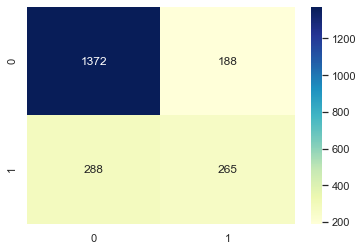

In [31]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu'))

In [32]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1560
           1       0.58      0.48      0.53       553

    accuracy                           0.77      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.77      0.77      2113




#### Decision Tree

In [33]:
#Implement Decision Tree classifier

DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
DTy_pred=DTclassifier.predict(X_test)

In [35]:
#checking accuracy

DTscore=accuracy_score(y_test,DTy_pred)
DTscore

0.7264552768575485

[[1266  294]
 [ 284  269]]
AxesSubplot(0.125,0.125;0.62x0.755)


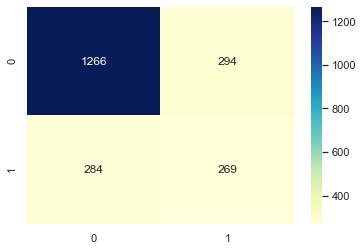

In [36]:
# Confusion Matrix
print(confusion_matrix(y_test, DTy_pred))

print(sns.heatmap(confusion_matrix(y_test, DTy_pred), annot=True, fmt='d', cmap='YlGnBu'))

In [37]:
#Classification Report
print(classification_report(y_test, DTy_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1560
           1       0.48      0.49      0.48       553

    accuracy                           0.73      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.73      0.73      2113



##### Naive Bayes

In [38]:
#Implement Gaussian Naive Bayes classifier

NBclassifier = GaussianNB()
NBclassifier.fit(X_train,y_train)

GaussianNB()

In [39]:
NBy_pred=NBclassifier.predict(X_test)

In [40]:
#checking accuracy
NBscore=accuracy_score(y_test,NBy_pred)
NBscore

0.7709417889256981

[[1294  266]
 [ 218  335]]
AxesSubplot(0.125,0.125;0.62x0.755)


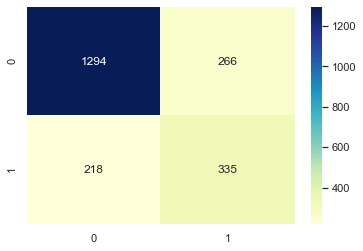

In [41]:
# Confusion Matrix
print(confusion_matrix(y_test, NBy_pred))

print(sns.heatmap(confusion_matrix(y_test, NBy_pred), annot=True, fmt='d', cmap='YlGnBu'))

In [42]:
#Classification Report
print(classification_report(y_test, NBy_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1560
           1       0.56      0.61      0.58       553

    accuracy                           0.77      2113
   macro avg       0.71      0.72      0.71      2113
weighted avg       0.78      0.77      0.77      2113

